# Test Kernel
To verify correct formulation of kernels used in our sparse GPs.

Import necessary libraries.

In [1]:
import jax
from jax import random
import jax.numpy as np

from kernels import *
import matplotlib.pyplot as plt

Define a set of grid points.

In [2]:
# Define a grid of points in 2D
num_points = 50
x = np.linspace(-5, 5, num_points)
X1 = np.vstack([x, np.zeros_like(x)]).T 

## Functions
Functions for testing our kernels.

In [3]:
# To gain geometric intuition regarding the covariance matrices.
'''
Plot a list of covariance matrices as heatmaps in a single row.
'''
def plot_covariance_matrices(matrices, titles):
    num_matrices = len(matrices)
    plt.figure(figsize=(6 * num_matrices, 5))

    for i, (K, title) in enumerate(zip(matrices, titles)):
        ax = plt.subplot(1, num_matrices, i + 1)
        im = ax.imshow(K, cmap="viridis")
        plt.colorbar(im, ax=ax, label='Covariance Value')
        ax.set_title(title)
        ax.set_xlabel('Point Index')
        ax.set_ylabel('Point Index')
    #

    plt.tight_layout()
    plt.show()
#

'''
Check if a matrix is symmetric.
'''
def is_symmetric(K):
    return np.allclose(K, K.T)
#

'''
Plot samples from a Gaussian Process prior given a kernel function and hyperparameters.
'''
def sample_gp_prior(X, kernel_func, hyperparams, num_samples=3, seed=0, jitter=1e-6):
    # Compute the covariance matrix
    K = kernel_func(X, X, hyperparams)
    
    # Add jitter to the diagonal for numerical stability
    K += hyperparams[0] * np.eye(K.shape[0])
    
    # Initialize random key
    prng_key = random.PRNGKey(seed)
    mean = np.zeros(X.shape[0])

    # Draw and plot each sample individually
    plt.figure(figsize=(8, 6))
    for i in range(num_samples):
        prng_key, subkey = random.split(prng_key)
        sample = random.multivariate_normal(subkey, mean, K)
        plt.plot(X[:, 0], sample, label=f'Sample {i+1}')
    #
    
    plt.title(f'Samples from GP Prior with {kernel_func.__name__}')
    plt.xlabel("X")
    plt.ylabel("Sample value")
    plt.legend()
    plt.show()
#

## Squared Exponential Kernel

In [4]:
# Set up different hyperparameters for each kernel
sqexp_hyperparams1 = [0.1, 1.0, 1.0]  # noise, signal, length scale
sqexp_hyperparams2 = [0.1, 2.0, 10.0]  # noise, signal, length scale

# Compute covariance matrices for each kernel and set of hyperparameters
K_sqexp1 = sqexp_cov_function(X1, X1, sqexp_hyperparams1)
K_sqexp2 = sqexp_cov_function(X1, X1, sqexp_hyperparams2)


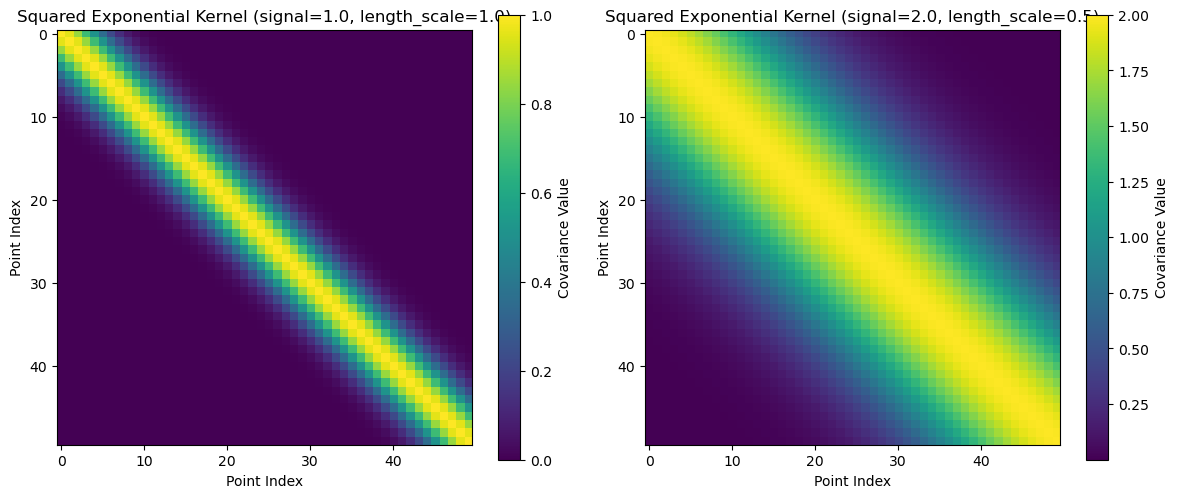

In [5]:
plot_covariance_matrices(
    [K_sqexp1, K_sqexp2],
    [
        'Squared Exponential Kernel (signal=1.0, length_scale=1.0)',
        'Squared Exponential Kernel (signal=2.0, length_scale=0.5)'
        ]
)

In [6]:
is_symmetric(K_sqexp1), is_symmetric(K_sqexp2)

(Array(True, dtype=bool), Array(True, dtype=bool))

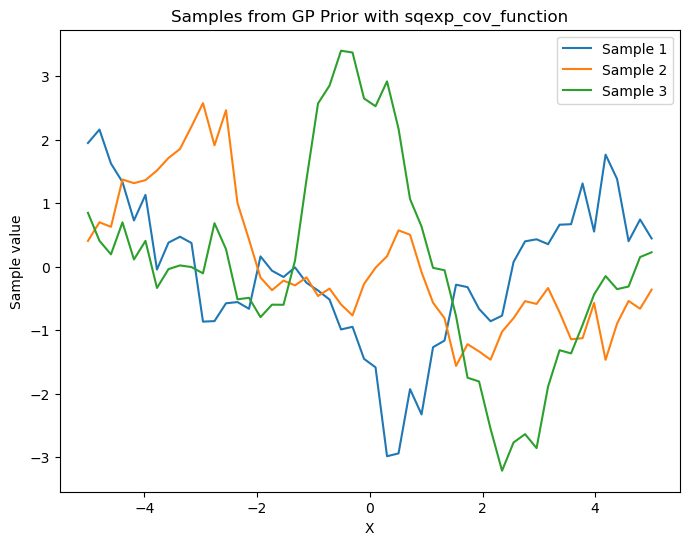

In [7]:
sample_gp_prior(X1, sqexp_cov_function, sqexp_hyperparams1)

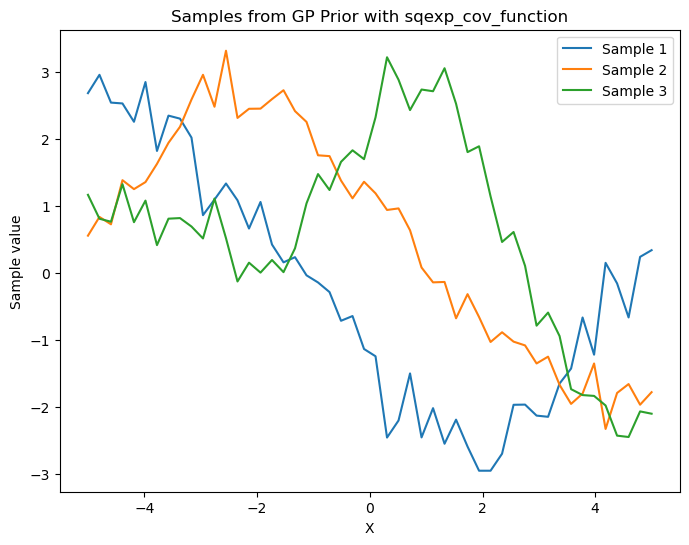

In [8]:
sample_gp_prior(X1, sqexp_cov_function, sqexp_hyperparams2)

## Linear Kernel 

In [9]:
# Set up different hyperparameters for each kernel
linear_hyperparams1 = [0.1, 1.0]  # noise, signal
linear_hyperparams2 = [0.1, 10]  # lower noise, lower signal

# Compute covariance matrices for each kernel and set of hyperparameters
K_linear1 = linear_cov_function(X1, X1, linear_hyperparams1)
K_linear2 = linear_cov_function(X1, X1, linear_hyperparams2)

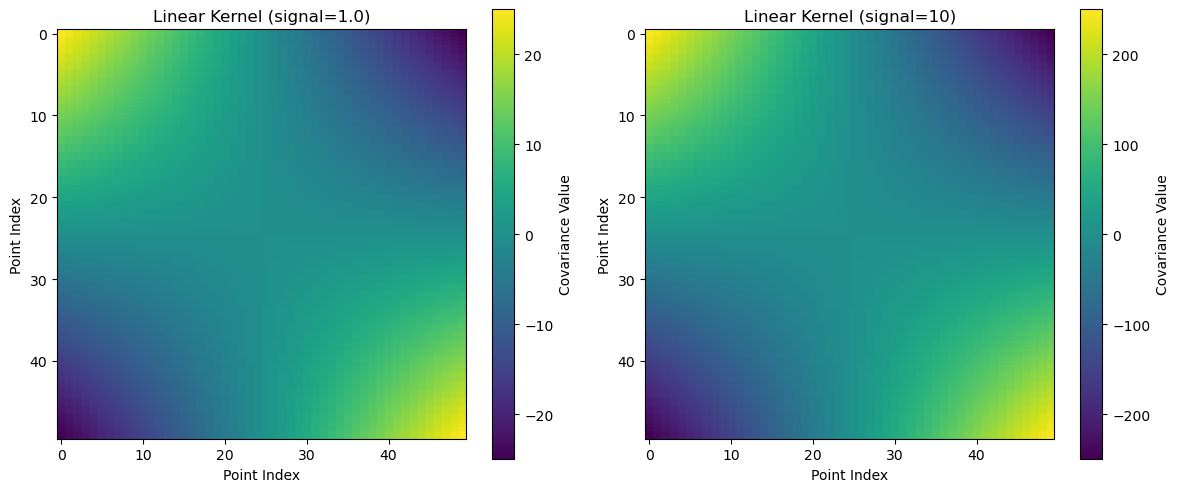

In [10]:
plot_covariance_matrices(
    [K_linear1, K_linear2],
    [
        'Linear Kernel (signal=1.0)',
        'Linear Kernel (signal=10)'
        ]
)


In [11]:
is_symmetric(K_linear1), is_symmetric(K_linear2)

(Array(True, dtype=bool), Array(True, dtype=bool))

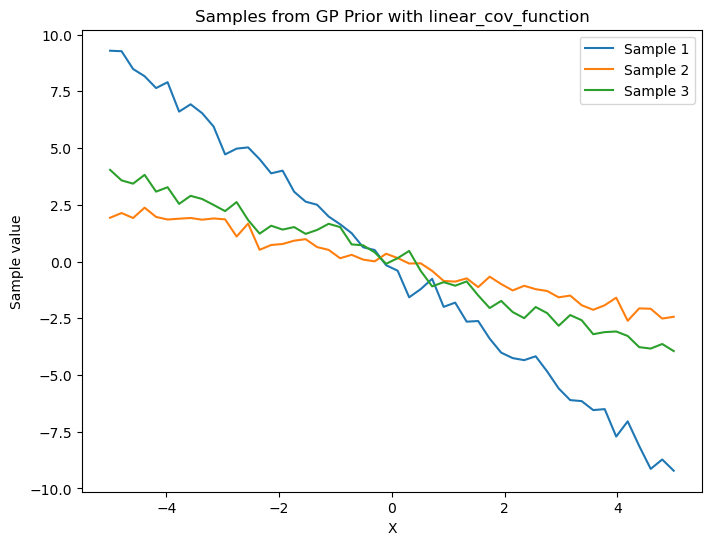

In [12]:
sample_gp_prior(X1, linear_cov_function, linear_hyperparams1)

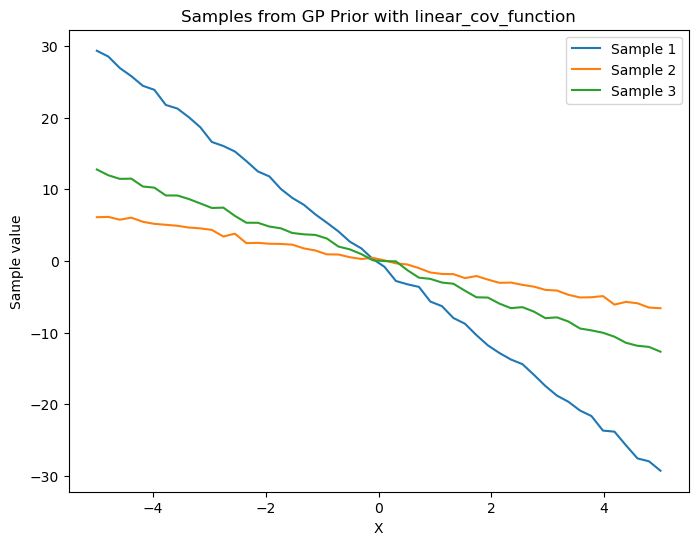

In [13]:
sample_gp_prior(X1, linear_cov_function, linear_hyperparams2)

## Matern Kernel


In [14]:
# Set up different hyperparameters for each kernel
# [noise_variance, signal_variance, length_scale, nu]
matern_hyperparams1 = [0.1, 1.0, 1.0]  # Suitable for rougher or less smooth symmetric data
matern_hyperparams2 = [0.1, 1.0, 1.5]  # Suitable for smoother, symmetric data

# Compute covariance matrices for each kernel and set of hyperparameters
K_matern1 = matern_cov_function(X1, X1, matern_hyperparams1)
K_matern2 = matern_cov_function(X1, X1, matern_hyperparams2)

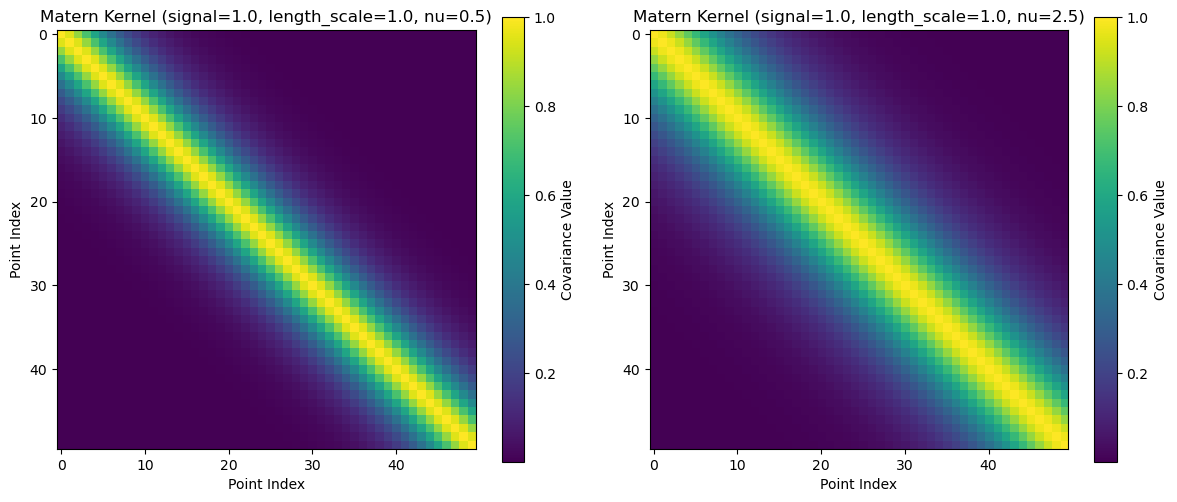

In [15]:
plot_covariance_matrices(
    [K_matern1, K_matern2],
    [
        'Matern Kernel (signal=1.0, length_scale=1.0, nu=0.5)',
        'Matern Kernel (signal=1.0, length_scale=1.0, nu=2.5)'
        ]
)

In [16]:
is_symmetric(K_matern1), is_symmetric(K_matern2)

(Array(True, dtype=bool), Array(True, dtype=bool))

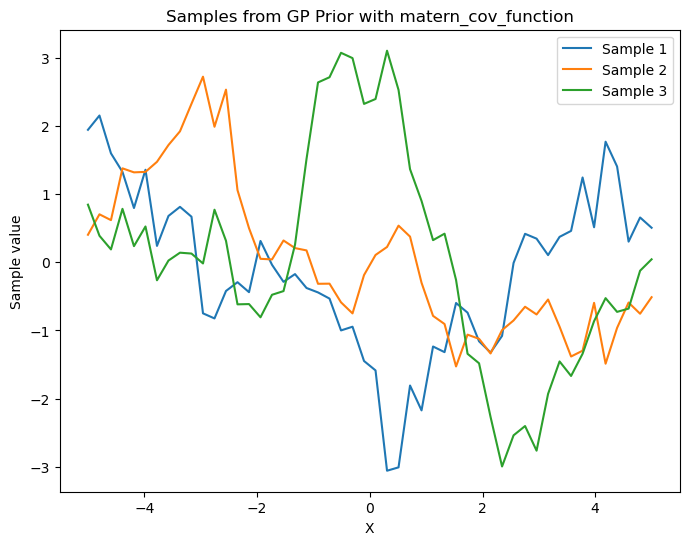

In [17]:
sample_gp_prior(X1, matern_cov_function, matern_hyperparams1) 


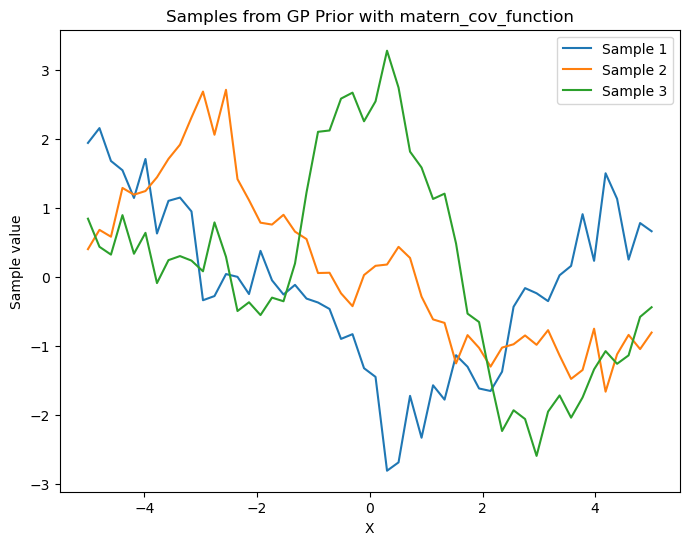

In [18]:
sample_gp_prior(X1, matern_cov_function, matern_hyperparams2)

## Sinusoidal Kernel

In [19]:
sinusoidal_hyperparams1 = [1, 1.0, 1.0, 5.0]  # Suitable for data that has longer periods and is more predictable
sinusoidal_hyperparams2 = [1, 1.0, 1.0, 1.0] #shorter more variable data
K_sinusoidal1 = sinusoidal_cov_function(X1,X1, sinusoidal_hyperparams1)
K_sinusoidal2 = sinusoidal_cov_function(X1,X1, sinusoidal_hyperparams2)


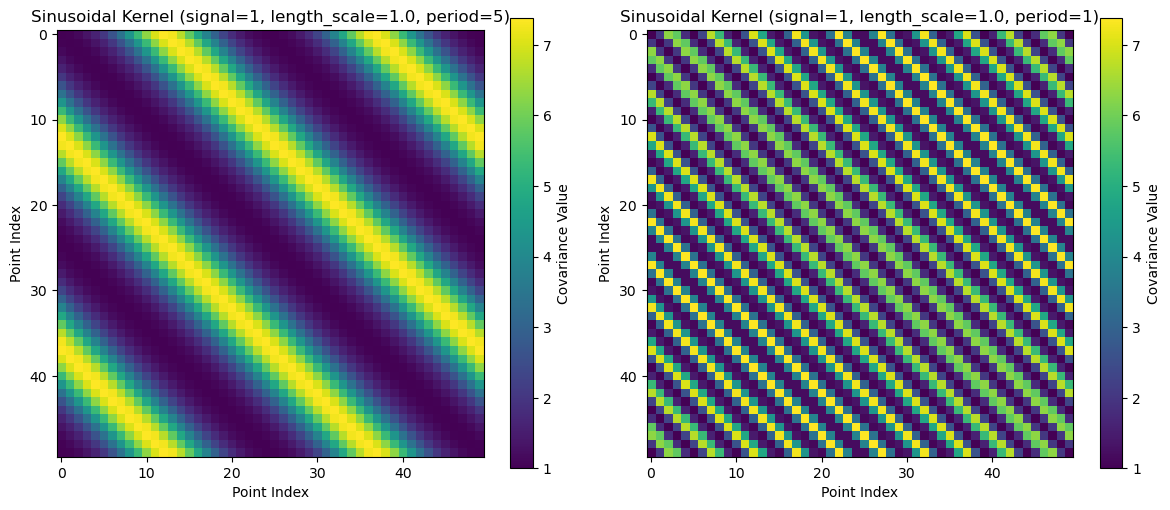

In [20]:
plot_covariance_matrices(
    [K_sinusoidal1, K_sinusoidal2],
    [
        'Sinusoidal Kernel (signal=1, length_scale=1.0, period=5)',
        'Sinusoidal Kernel (signal=1, length_scale=1.0, period=1)',
        ]
)

## Spectral Mixture Kernel

In [21]:
# Noise level
noise = 0.1

# Spectral mixture 1
weights = [1, 5]
means = [
    [0.3, 0.3],  # 2 dimensions
    [0.0, 0.0]
]
variances = [
    [0.0005, 0.0003], 
    [0.004, 0.0002]
]

# Spectral mixture 2
weights2 = [1.0, 0.8, 0.5]
means2 = [
    [0.3, 0.3],
    [0.0, 0.0],
    [0.5, 0.5]
]
variances2 = [
    [500.0, 300.0],
    [400.0, 200.0],
    [100.0, 100.0]
]

# Construct hyperparameters for each spectral mixture
# Include number of components
hyperparams1 = [noise, len(weights)]  # Start with noise and num_components
for i in range(len(weights)):
    hyperparams1.append(weights[i])
    hyperparams1.extend(means[i])
    hyperparams1.extend(variances[i])
#

hyperparams2 = [noise, len(weights2)]  # Start with noise and num_components
for i in range(len(weights2)):
    hyperparams2.append(weights2[i])
    hyperparams2.extend(means2[i])
    hyperparams2.extend(variances2[i])
#

K_spectral_mixture1 = spectral_mix_cov_function(X1, X1, hyperparams1) # Original unchanged
K_spectral_mixture2 = spectral_mix_cov_function(X1, X1, hyperparams2) # Updated with large variance, varying frequencies

Extracted Weights: [1 5]
Extracted Means: [[0.3 0.3]
 [0.  0. ]]
Extracted Variances: [[0.0005 0.0003]
 [0.004  0.0002]]
Extracted Weights: [1.  0.8 0.5]
Extracted Means: [[0.3 0.3]
 [0.  0. ]
 [0.5 0.5]]
Extracted Variances: [[500. 300.]
 [400. 200.]
 [100. 100.]]


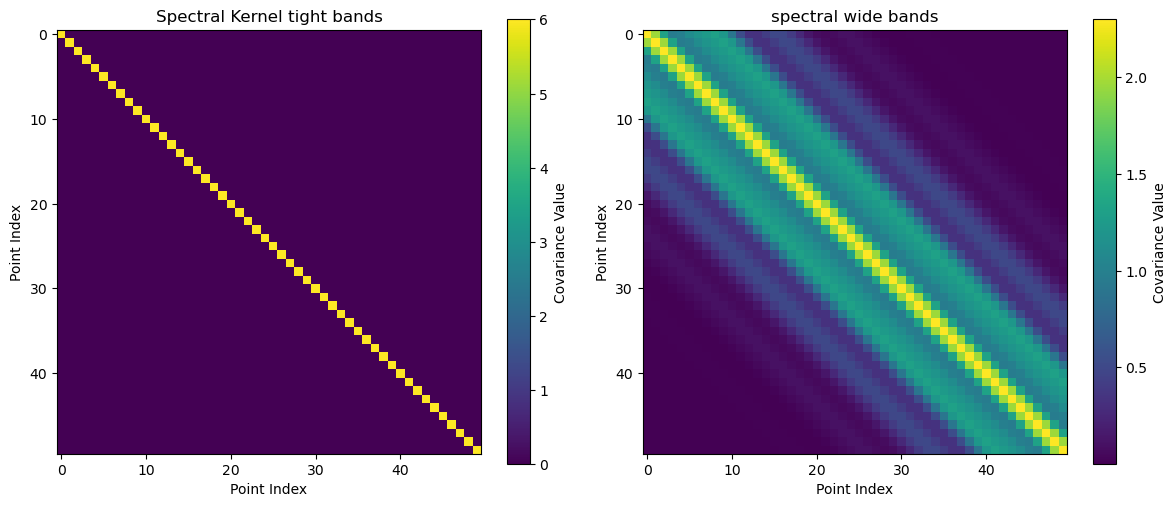

In [22]:
plot_covariance_matrices(
    [K_spectral_mixture1, K_spectral_mixture2],
    [
        'Spectral Kernel tight bands',
        'spectral wide bands'
        ]
)